# Action1	


"Project：智能供应链分析

数据集：SupplyChainDataset.csv，供应链采购数据

To Do：

供应链数据探索

对用户进行分层运营"		

"1、完成数据探索（20points）

2、完成RFM用户分层  (20points）"

In [1]:
import pandas as pd

dataset = pd.read_csv('./SupplyChain.csv', encoding='unicode_escape')
dataset.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
dataset.shape
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64

In [8]:
dataset['Customer Zipcode'].value_counts()
dataset['Customer Zipcode'].fillna(dataset['Customer Zipcode'].mode()[0],inplace=True)

In [10]:
dataset['Customer Zipcode'].value_counts()

725.0      66773
921.0        337
23455.0      334
957.0        297
79109.0      292
           ...  
60636.0       18
89015.0       16
32210.0       15
7728.0        13
11225.0        9
Name: Customer Zipcode, Length: 995, dtype: int64

In [12]:
temp = dataset.isnull().sum()
temp[temp>0]

Customer Lname              8
Order Zipcode          155679
Product Description    180519
dtype: int64

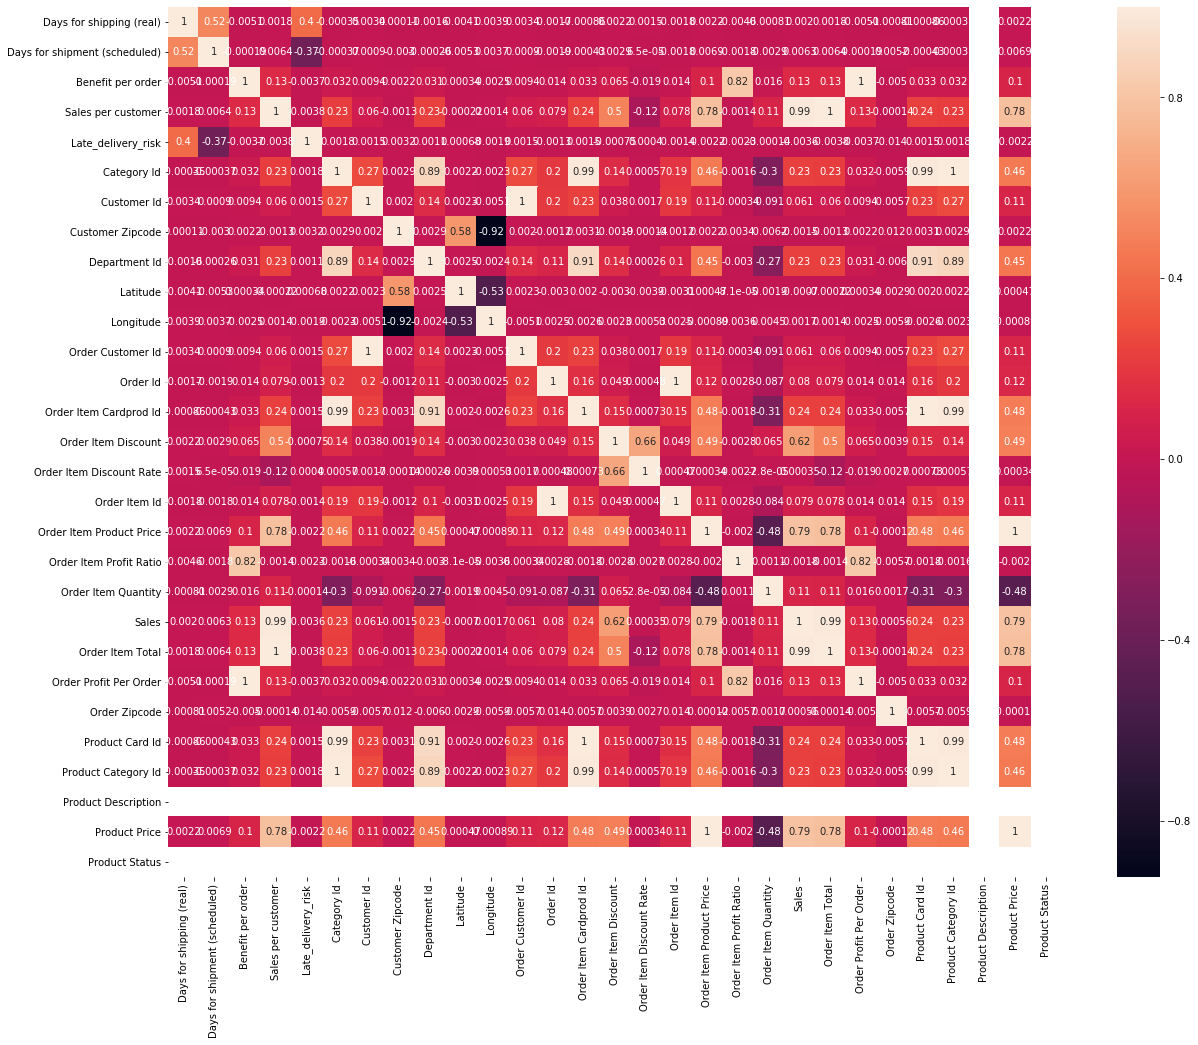

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,16))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

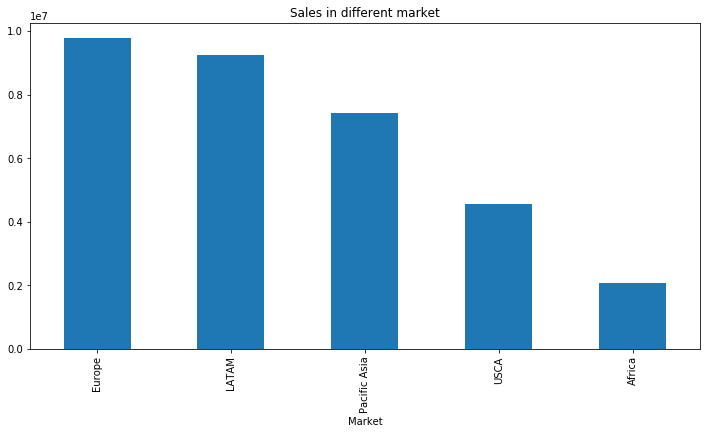

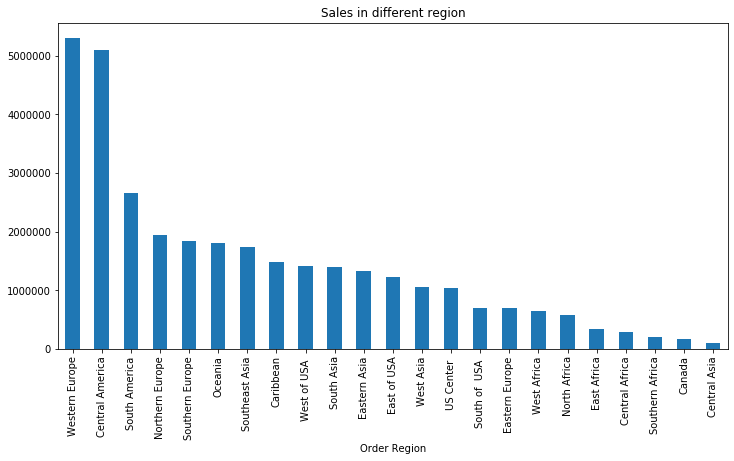

In [17]:
data = dataset

data[['Sales per customer', 'Market']] 

#group by market
market = data.groupby('Market')
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different market')
plt.show()

#group by region
region = data.groupby('Order Region')
region['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Sales in different region')
plt.show()


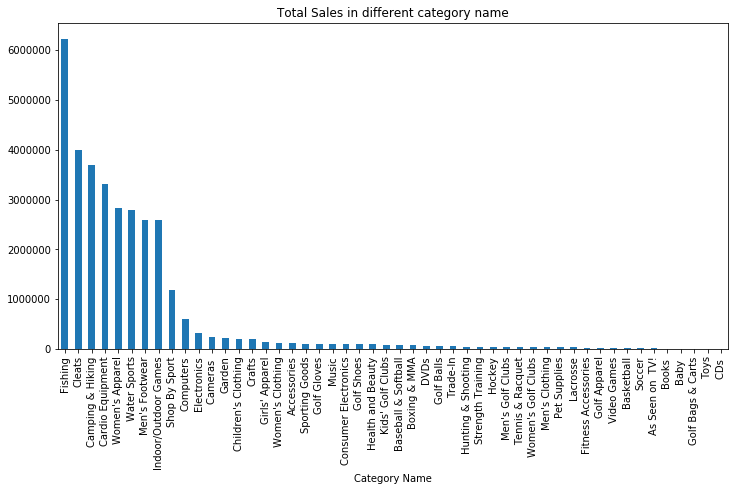

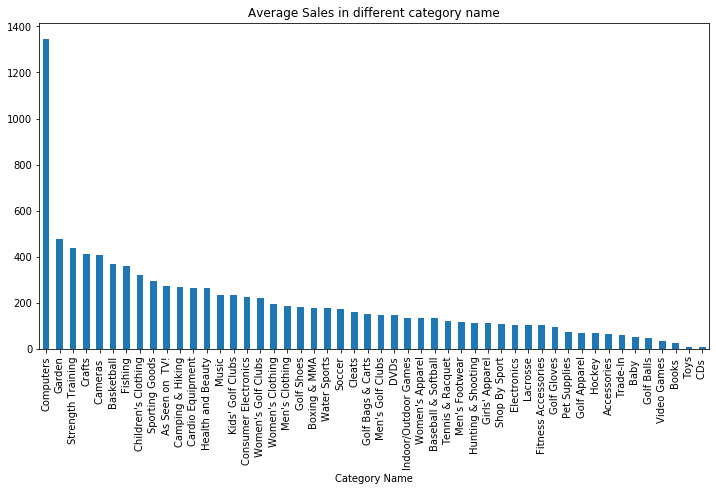

In [19]:
# group by cate name
cat = data.groupby('Category Name')
cat['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Total Sales in different category name')
plt.show()

cat['Sales per customer'].mean().sort_values(ascending=False).plot.bar(figsize=(12,6), title='Average Sales in different category name')
plt.show()

In [22]:
# group by time
temp = pd.DatetimeIndex(data['order date (DateOrders)'])
temp

DatetimeIndex(['2018-01-31 22:56:00', '2018-01-13 12:27:00',
               '2018-01-13 12:06:00', '2018-01-13 11:45:00',
               '2018-01-13 11:24:00', '2018-01-13 11:03:00',
               '2018-01-13 10:42:00', '2018-01-13 10:21:00',
               '2018-01-13 10:00:00', '2018-01-13 09:39:00',
               ...
               '2016-01-16 06:49:00', '2016-01-16 06:49:00',
               '2016-01-16 06:28:00', '2016-01-16 06:07:00',
               '2016-01-16 05:04:00', '2016-01-16 03:40:00',
               '2016-01-16 01:34:00', '2016-01-15 21:00:00',
               '2016-01-15 20:18:00', '2016-01-15 18:54:00'],
              dtype='datetime64[ns]', name='order date (DateOrders)', length=180519, freq=None)

In [25]:
data['order_year'] = temp.year
data['order_month'] = temp.month
data['order_week_day'] = temp.weekday
data['order_hour'] = temp.hour
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_year,order_month,order_week_day,order_hour
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,2018,1,2,22
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,2018,1,5,12
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,2018,1,5,12
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class,2018,1,5,11
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class,2018,1,5,11


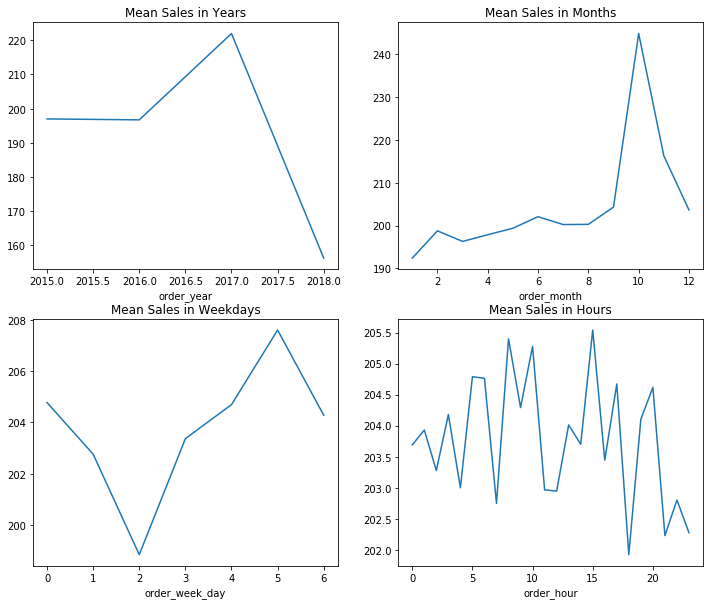

In [27]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
df_year = data.groupby('order_year')
df_year['Sales'].mean().plot(title='Mean Sales in Years')

plt.subplot(2,2,2)
df_month = data.groupby('order_month')
df_month['Sales'].mean().plot(title='Mean Sales in Months')

plt.subplot(2,2,3)
df_weekday = data.groupby('order_week_day')
df_weekday['Sales'].mean().plot(title='Mean Sales in Weekdays')

plt.subplot(2,2,4)
df_hour = data.groupby('order_hour')
df_hour['Sales'].mean().plot(title='Mean Sales in Hours')

In [28]:
# rfm 用户分层
data['order date (DateOrders)'] = pd.to_datetime(data['order date (DateOrders)'])
data['order date (DateOrders)'].max()

Timestamp('2018-01-31 23:38:00')

In [36]:
import datetime
now = datetime.datetime(2018,2,1)

#RFM
customer_seg = data.groupby('Customer Id').agg({'order date (DateOrders)': lambda x: (now-x.max()).days,  \
                                             'Order Id': lambda x: len(x), 'Sales': lambda x: x.sum()})
customer_seg                                          

,order date (DateOrders),Order Id,Sales
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [37]:
customer_seg.rename(columns = {'order date (DateOrders)':'R_value', 'Order Id':'F_value', \
                               'Sales':'M_value'}, inplace=True)
customer_seg

,R_value,F_value,M_value
Customer Id,,,
1,792,1,499.950012
2,136,10,1819.730034
3,229,18,3537.680094
4,380,14,1719.630030
5,457,7,1274.750023
...,...,...,...
20753,0,1,215.820007
20754,0,1,215.820007
20755,0,1,327.750000


In [38]:
# devide into groups
quantiles = customer_seg.quantile(q=[0.5])
quantiles = quantiles.to_dict()
quantiles

{'R_value': {0.5: 159.0},
 'F_value': {0.5: 7.0},
 'M_value': {0.5: 1499.82503324}}

In [41]:
# R_value
def R_Score(x, b, c):
    if x<c[b][0.5]:
        return 2
    else:
        return 1
    
def FM_Score(x, b, c):
    if x>=c[b][0.5]:
        return 2
    else:
        return 1 

In [42]:
# R_Score
customer_seg['R_Score'] = customer_seg['R_value'].apply(R_Score, args=('R_value', quantiles))
# F
customer_seg['F_Score'] = customer_seg['F_value'].apply(FM_Score, args=('R_value', quantiles))
# M
customer_seg['M_Score'] = customer_seg['M_value'].apply(FM_Score, args=('R_value', quantiles))


In [43]:
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score
Customer Id,,,,,,
1,792,1,499.950012,1,1,2
2,136,10,1819.730034,2,1,2
3,229,18,3537.680094,1,1,2
4,380,14,1719.630030,1,1,2
5,457,7,1274.750023,1,1,2
...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,2
20754,0,1,215.820007,2,1,2
20755,0,1,327.750000,2,1,2


In [45]:
# RFM
def RFM_user(df):
    if df['M_Score'] == 2 and df['F_Score'] ==2 and df['R_Score'] ==2:
        return '重要价值用户'
    elif df['M_Score'] == 2 and df['F_Score'] ==1 and df['R_Score'] ==2:
        return '重要发展用户'
    elif df['M_Score'] == 2 and df['F_Score'] ==2 and df['R_Score'] ==1:
        return '重要保持用户'
    elif df['M_Score'] == 2 and df['F_Score'] ==1 and df['R_Score'] ==1:
        return '重要挽留用户'
    
    elif df['M_Score'] == 1 and df['F_Score'] ==2 and df['R_Score'] ==2:
        return '一般价值用户'
    elif df['M_Score'] == 1 and df['F_Score'] ==1 and df['R_Score'] ==2:
        return '一般发展用户'
    elif df['M_Score'] == 1 and df['F_Score'] ==2 and df['R_Score'] ==1:
        return '一般保持用户'
    elif df['M_Score'] == 1 and df['F_Score'] ==1 and df['R_Score'] ==1:
        return '一般挽留用户'

In [46]:
customer_seg['Customer_Type'] = customer_seg.apply(RFM_user, axis=1)
customer_seg

,R_value,F_value,M_value,R_Score,F_Score,M_Score,Customer_Type
Customer Id,,,,,,,
1,792,1,499.950012,1,1,2,重要挽留用户
2,136,10,1819.730034,2,1,2,重要发展用户
3,229,18,3537.680094,1,1,2,重要挽留用户
4,380,14,1719.630030,1,1,2,重要挽留用户
5,457,7,1274.750023,1,1,2,重要挽留用户
...,...,...,...,...,...,...,...
20753,0,1,215.820007,2,1,2,重要发展用户
20754,0,1,215.820007,2,1,2,重要发展用户
20755,0,1,327.750000,2,1,2,重要发展用户
